In [1]:
# @title Before playing, must download files!!

import pandas as pd

trivia_df = pd.read_csv("trivia.csv")


#Trivia for Treasure!




MYSTERIOUS MERCHANT:"Alas! If you wish to redeem this prized heirloom, you must first acquire a sum of 30 knowlege gems..." 

In this world, there are two ways to earn knowledge gems; two wizards with different intrests who will grant you gems if you engage successfully in their games.
You may choose to visit the knowledgeable Wizard of Wisdom, or the risky Wizard of Odds.


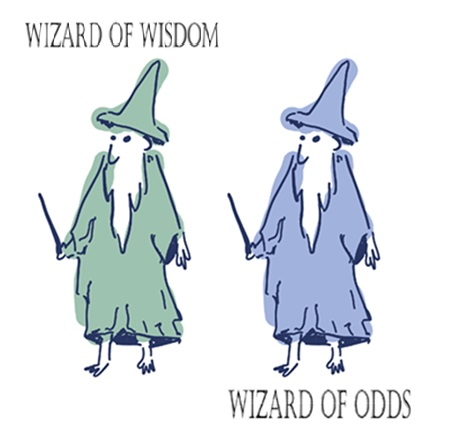


Best of luck on your quest for knowledge gems!


In [2]:
# @title Story Introduction
# @markdown Welcome to Trivia for Treasure! You are a young adventurer who has found the location of an ancient treasure chest. You have searched far and wide for the key to such treasure only to find that it can be purchased from the old, Mysterious Merchant. However, the Mysterious Merchant, bizzare in his own right, only accepts payment in the form of knowlege gems.

print('')
print('MYSTERIOUS MERCHANT:"Alas! If you wish to redeem this prized heirloom, you must first acquire a sum of 30 knowlege gems..." ')
print('')
print('In this world, there are two ways to earn knowledge gems; two wizards with different intrests who will grant you gems if you engage successfully in their games.')
print('You may choose to visit the knowledgeable Wizard of Wisdom, or the risky Wizard of Odds.')
from IPython.display import Image
display(Image(filename="wizardspic.jpg"))

print('')
print('Best of luck on your quest for knowledge gems!')


In [ ]:
# @title Go get those gems!

import random

# Basic correct functions
gems = 0

def roll_points():
  '''
  Rolls for  random number of points
  '''
  points = random.randrange(5,10)
  return points

def correct(gems):
  '''
  Process for awarding gems after correct answer
  :param gems: initial gems before correct answer
  :return : new value of gems
  '''
  print('')
  points = roll_points()
  print('You have earned', points, 'knowledge gems!')
  gems += points
  print('You now have', gems, 'knowledge gems!')
  return gems

# testing
#gems = correct(gems)
#gems = correct(gems)

name = input('What is your name young adventurer?     ')

# Trivia Wizard

def trivia_game(gems):
  '''
  Asks trivia questions and rewards correct answers with gems
  :param gems: initial gems before correct answer
  :return : value of gems
  '''
  print(f'Welcome {name}, I have prepared a query of wisdom just for your arrival.')

  # get all the unique question IDs
  qs = trivia_df['questionID'].unique()

  # choose a random question id
  randomQId = random.choice(qs)

  # get the question text and the answers in a mini dataframe
  question = trivia_df[trivia_df['questionID'] == randomQId ]

  questionText = question['question'].iloc[0]

  answerList = question['answerText'].to_list()
  optionList = question['answerOption'].to_list()
  isCorrectList = question['isCorrect'].to_list()

  for i in range(len(isCorrectList)):
    if isCorrectList[i] == True:
      correct_answer = answerList[i]

  # gameplay

  print(questionText)
  print(f'A: {answerList[0]}')
  print(f'B: {answerList[1]}')
  print(f'C: {answerList[2]}')

  guess = input('Enter your choice: A, B, or C    ').upper()
  print('')

  # fixing disobeying player
  error_message = 'Do not dare to fool me with that improper answer! Remember, you may only enter a multiple choice answer. '
  while guess not in 'ABC':
    print(error_message)
    guess = input('Enter your choice: A, B, or C    ')

  # game results
  index = optionList.index(guess)

  if isCorrectList[index] == True:
    print(f'Correct! I congradulate you, clever {name}, for exhibiting such impeccable knowledge!')
    gems = correct(gems)
    print('')
  else:
    print(f'To my deepest dismay, that answer was incorrect. The correct answer was {correct_answer}. May you be more fortunate in your following attempt.')
    print('')

  return gems

#how to call function
#gems = trivia_game(gems)


# Probability Wizard
def probability_game(gems):
  '''
  Plays with user a high/low probability game and rewards correct guesses with gems
  :param gems: initial gems before correct answer
  :return : value of gems
  '''
  #game setup
  print(f'Greetings {name}, I have prepared for you a game of High Card, Low Card. The cards range from 1 to 12')
  first_number = random.randrange(1,12)
  print('Behold! Your first card is a', first_number)
  print('Look into the future to determine whether your next card will be greather than or less than', first_number,'.')
  next_number = random.randrange(1,12)

  # fixing disobeying player
  while next_number == first_number:
    next_number = random.randrange(1,12)
  guess = (input('If you see that the next card will be higher than the first card, enter 1. If you believe it will be lower, enter 2.   '))
  while guess not in ['1','2']:
    print('Do not try to fool me! I am a wise wizard and do not wish for my time to be wasted. Try again.')
    guess = (input('If you see that the next card will be higher than the first card, enter 1. If you believe it will be lower, enter 2.   '))

  print('')

  #game results
  if (guess == '1') and (next_number > first_number):
    print(f'Congratulations, savvy {name}! Your intuitions have guided you successfully as the second card was a {next_number}.')
    gems = correct(gems)
    print('')
  elif (guess == '2') and (next_number < first_number):
    print(f"Congratulations, savvy {name}! Your intuitions have guided you successfully as the second card was a {next_number}.")
    gems = correct(gems)
    print('')
  else:
    print('I am terribly sorry, but your answer was incorrrect.', next_number,'was the second card... Better luck next time.')
    print('')

  return gems

#how to call funtion
# gems = probability_game(gems)



# playing the game
while gems < 30:
  gameChoice = (input('What wizard do you wish to visit? Enter 1 to visit the Wizard of Wisdom, or enter 2 to visit the Wizard of Odds.   '))
  while gameChoice not in ['1','2']:
    print('You may only enter 1 or 2')
    gameChoice = (input('What wizard do you wish to visit? Enter 1 to visit the Wizard of Wisdom, or enter 2 to visit the Wizard of Odds.   '))
  if gameChoice == '1':
    print('')
    gems = trivia_game(gems)
  if gameChoice == '2':
    print('')
    gems = probability_game(gems)


# after 30 gems met
print('Alas! Now that you have accumalated at least 30 knowledge gems, you may purchase the key to your hidden treasure!')
print('')
print('One trip to the mysterious merchant later...')
print('')

treasure = (input('You have acquired the key to the treasure! Enter 1 to open the treasure chest.'))

while treasure not in '1':
  treasure = input("Don't you want to see what's inside? You must enter 1 to open the treasure.")

if treasure == '1':
  from IPython.display import Image
  display(Image(filename="treasure.jpg"))
  print('Congradulations! You win!')
  print('')
  print('Thank you for playing :)')






Welcome j, I have prepared a query of wisdom just for your arrival.
Which of these authors has NOT won both a Nobel and a Pulitzer Prize?
A: John Steinbeck
B: John Updike
C: Toni Morrison

Correct! I congradulate you, clever j, for exhibiting such impeccable knowledge!

You have earned 8 knowledge gems!
You now have 8 knowledge gems!

You may only enter 1 or 2

Welcome j, I have prepared a query of wisdom just for your arrival.
Laura Ingalls Wilder wrote a series of kids' books called "Little House on the" what?
A: Garbage Island
B: Prairie
C: Volcano

To my deepest dismay, that answer was incorrect. The correct answer was Prairie. May you be more fortunate in your following attempt.


Greetings j, I have prepared for you a game of High Card, Low Card. The cards range from 1 to 12
Behold! Your first card is a 2
Look into the future to determine whether your next card will be greather than or less than 2 .

I am terribly sorry, but your answer was incorrrect. 9 was the second card... B